# Introduction

In this analysis, we leverage SQL to extract and analyze key insights from the Superstore dataset. The dataset encompasses a wide range of information including orders, products, customers, and sales metrics. By employing SQL queries, we can efficiently aggregate data, compute total sales and profits, and identify trends across different dimensions such as categories, regions, and time periods. This notebook showcases various SQL-based queries to uncover critical business insights, which are further visualized to facilitate a comprehensive understanding of sales performance and strategic opportunities.

## Setup and Load Data

In [156]:
import sqlite3

In [158]:
import pandas as pd

In [170]:
import pandasql as ps

###  Load the Excel file

In [160]:
file_path = r'C:\Users\LENOVO\Desktop\Excel & Data Anlysis\Sample - Superstore.xlsx'

In [162]:
df = pd.read_excel(file_path, sheet_name='Orders')

### Connect to SQLite database (in-memory)

In [164]:
conn = sqlite3.connect(':memory:')

### Load DataFrame into SQL

In [166]:
df.to_sql('orders', conn, index=False, if_exists='replace')

10194

## Step 2: Perform SQL Queries

### 1. Top 10 Products by Sales

In [17]:
query = """
SELECT "Product Name", SUM(Sales) AS TotalSales
FROM orders
GROUP BY "Product Name"
ORDER BY TotalSales DESC
LIMIT 10;
"""

In [19]:
top_products = pd.read_sql(query, conn)

In [21]:
top_products

,Product Name,TotalSales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


### 2.Total Sales by Category

In [23]:
query = """
SELECT Category, SUM(Sales) AS TotalSales
FROM orders
GROUP BY Category
ORDER BY TotalSales DESC;
"""

In [25]:
sales_by_category = pd.read_sql(query, conn)

In [27]:
sales_by_category

,Category,TotalSales
0,Technology,839893.2790
1,Furniture,754747.7613
2,Office Supplies,731893.3140


### 3. Total Profit by Sub-Category

In [29]:
query = """
SELECT "Sub-Category", SUM(Profit) AS TotalProfit
FROM orders
GROUP BY "Sub-Category"
ORDER BY TotalProfit DESC;
"""

In [31]:
profit_by_sub_category = pd.read_sql(query, conn)

In [33]:
profit_by_sub_category

,Sub-Category,TotalProfit
0,Copiers,56093.9365
1,Phones,45050.8265
2,Accessories,41936.6357
3,Paper,34511.5070
4,Binders,31426.1003
5,Chairs,27223.5323
6,Storage,21285.1115
7,Appliances,18329.4844
8,Furnishings,13891.7430
9,Envelopes,6988.0247


### Profit by Sub-Category:Bar Chart

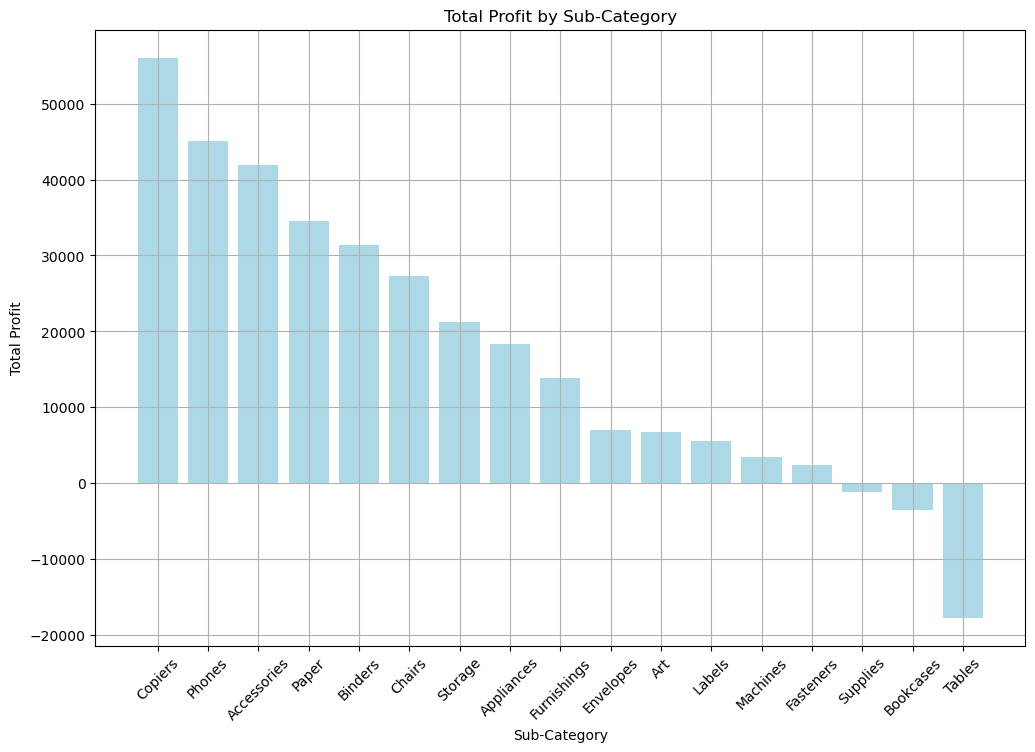

In [274]:
plt.figure(figsize=(12,8))
plt.bar(profit_by_sub_category['Sub-Category'], profit_by_sub_category['TotalProfit'], color='lightblue')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4. Sales by Region

In [35]:
query = """
SELECT Region, SUM(Sales) AS TotalSales
FROM orders
GROUP BY Region
ORDER BY TotalSales DESC;
"""

In [37]:
sales_by_region = pd.read_sql(query, conn)

In [39]:
sales_by_region

,Region,TotalSales
0,West,739813.6085
1,East,691828.1680
2,Central,503170.6728
3,South,391721.9050


### Sales by Region Bar Chart

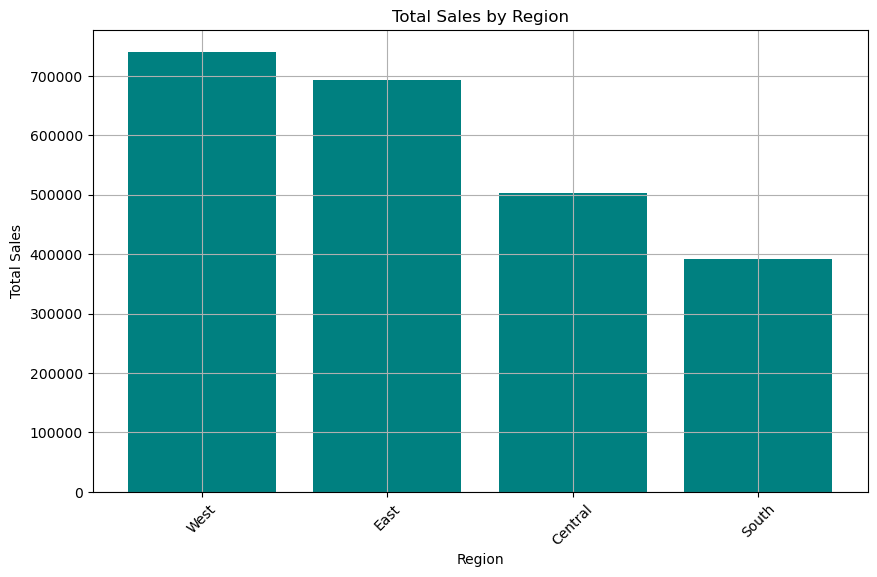

In [251]:
plt.figure(figsize=(10,6))
plt.bar(sales_by_region['Region'], sales_by_region['TotalSales'], color='teal')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 5. Top 5 Customers by Sales

In [41]:
query = """
SELECT "Customer Name", SUM(Sales) AS TotalSales
FROM orders
GROUP BY "Customer Name"
ORDER BY TotalSales DESC
LIMIT 5;
"""

In [43]:
top_customers = pd.read_sql(query, conn)

In [45]:
top_customers

,Customer Name,TotalSales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571


### 6. Average Discount by Category

In [47]:
query = """
SELECT Category, AVG(Discount) AS AverageDiscount
FROM orders
GROUP BY Category;
"""

In [49]:
avg_discount_by_category = pd.read_sql(query, conn)

In [51]:
avg_discount_by_category

,Category,AverageDiscount
0,Furniture,0.172962
1,Office Supplies,0.156348
2,Technology,0.131475


### 7. Total Quantity Ordered by Category

In [59]:
query = """
SELECT Category, SUM(Quantity) AS TotalQuantity
FROM orders
GROUP BY Category
ORDER BY TotalQuantity DESC;
"""

In [61]:
quantity_by_category = pd.read_sql(query, conn)

In [63]:
quantity_by_category

,Category,TotalQuantity
0,Office Supplies,23268
1,Furniture,8369
2,Technology,7017


### Total Quantity Ordered by Category:Pie Chart

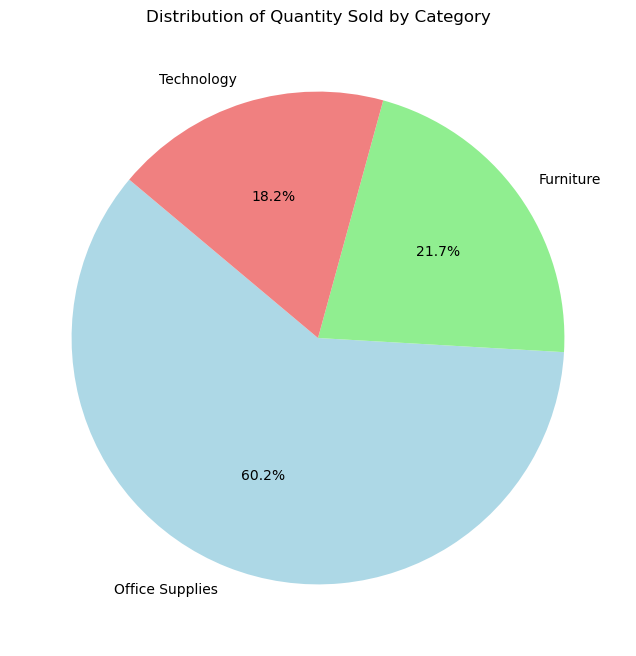

In [278]:
plt.figure(figsize=(8,8))
plt.pie(quantity_by_category['TotalQuantity'], labels=quantity_by_category['Category'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Quantity Sold by Category')
plt.show()

### 8.Top 10 States by Profit

In [65]:
query = """
SELECT "State/Province", SUM(Profit) AS TotalProfit
FROM orders
GROUP BY "State/Province"
ORDER BY TotalProfit DESC
LIMIT 10;
"""

In [67]:
top_states_by_profit = pd.read_sql(query, conn)

In [69]:
top_states_by_profit

,State/Province,TotalProfit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


### 9. Sales Performance by Segment

In [71]:
query = """
SELECT Segment, SUM(Sales) AS TotalSales, SUM(Profit) AS TotalProfit
FROM orders
GROUP BY Segment
ORDER BY TotalSales DESC;
"""

In [73]:
sales_by_segment = pd.read_sql(query, conn)

In [75]:
sales_by_segment

,Segment,TotalSales,TotalProfit
0,Consumer,1.170660e+06,136371.4463
1,Corporate,7.158061e+05,94249.6400
2,Home Office,4.400684e+05,61675.7283


### 10. Yearly Sales Trends

In [85]:
query_year = """
SELECT strftime('%Y', "Order Date") AS Year,
       SUM(Sales) AS TotalSales
FROM orders
GROUP BY Year
ORDER BY Year;
"""

In [87]:
yearly_sales_trend = pd.read_sql(query_year, conn)


In [89]:
yearly_sales_trend

,Year,TotalSales
0,2019,494040.2121
1,2020,472993.0310
2,2021,613933.5800
3,2022,745567.5312


In [97]:
import matplotlib.pyplot as plt

### For Monthly Sales by Month Name: Line chart

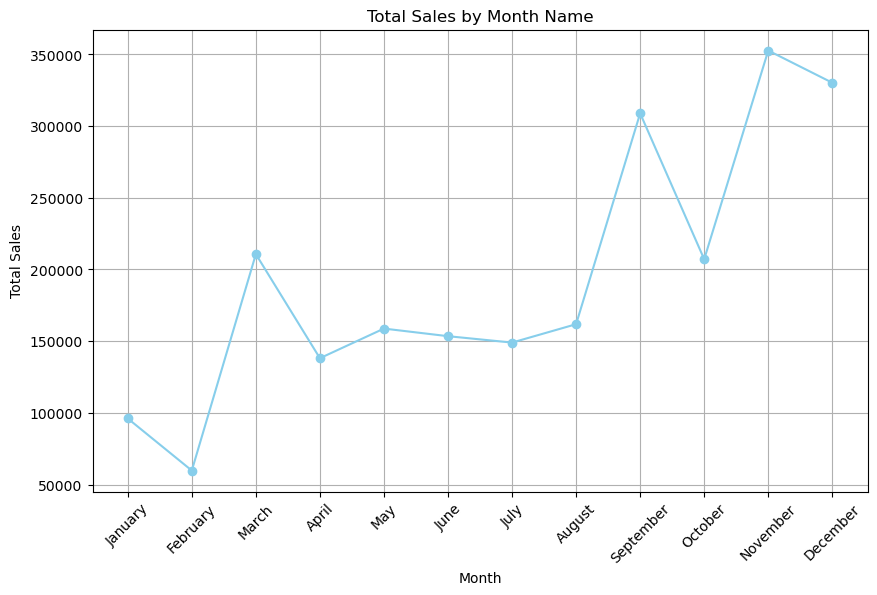

In [142]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales_by_month['MonthName'], monthly_sales_by_month['TotalSales'], marker='o', color='skyblue')
plt.title('Total Sales by Month Name')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

###  For Yearly Sales Trends:Line Chart

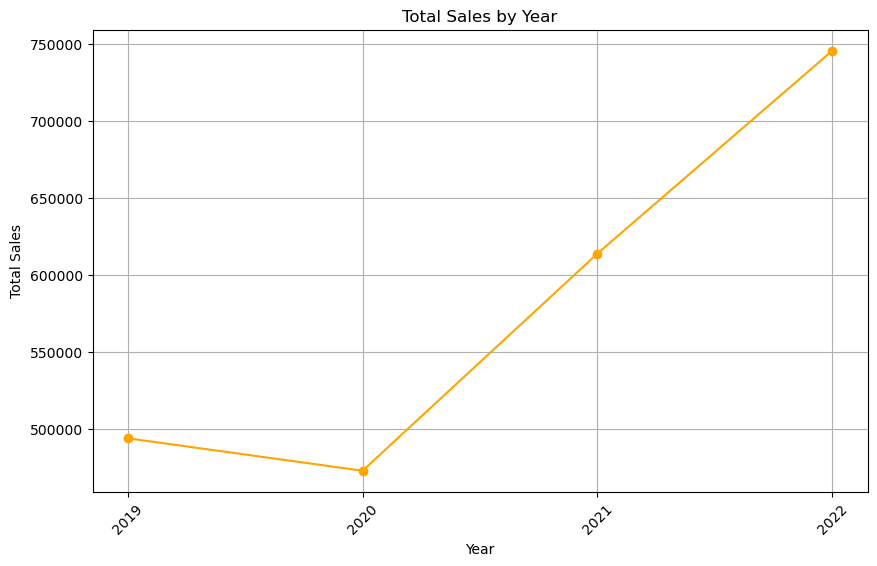

In [150]:
plt.figure(figsize=(10,6))
plt.plot(yearly_sales_trend['Year'], yearly_sales_trend['TotalSales'], marker='o', color='orange')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 11. Top 5 Products by Total Sales

In [184]:
query = """
WITH ProductSales AS (
    SELECT "Product Name",
           SUM(Sales) AS TotalSales
    FROM orders
    GROUP BY "Product Name"
)
SELECT "Product Name", TotalSales
FROM ProductSales
ORDER BY TotalSales DESC
LIMIT 5;
"""

In [186]:
top_5_products = pd.read_sql_query(query, conn)

In [188]:
top_5_products

,Product Name,TotalSales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479


### 12. Yearly Average Discount by Region

In [201]:
query = """
SELECT strftime('%Y', "Order Date") AS Year,
       "Region",
       AVG(Discount) AS AverageDiscount
FROM orders
GROUP BY Year, "Region"
ORDER BY Year, "Region";
"""

In [203]:
yearly_avg_discount = pd.read_sql_query(query, conn)

In [205]:
yearly_avg_discount

,Year,Region,AverageDiscount
0,2019,Central,0.264936
1,2019,East,0.150893
2,2019,South,0.120487
3,2019,West,0.102737
4,2020,Central,0.240630
5,2020,East,0.134940
6,2020,South,0.156912
7,2020,West,0.112154
8,2021,Central,0.221872
9,2021,East,0.143413


### 13. Customer Segments with Highest Profit

In [208]:
query = """
SELECT "Segment",
       SUM(Profit) AS TotalProfit
FROM orders
GROUP BY "Segment"
HAVING TotalProfit > 100000
ORDER BY TotalProfit DESC;
"""

In [210]:
customer_segments_profit = pd.read_sql_query(query, conn)

In [212]:
customer_segments_profit

,Segment,TotalProfit
0,Consumer,136371.4463


### 14. Top 3 Regions by Total Quantity Ordered

In [298]:
query = """
SELECT "Region",
       SUM(Quantity) AS TotalQuantity
FROM orders
GROUP BY "Region"
ORDER BY TotalQuantity DESC
LIMIT 3;
"""

In [217]:
top_3_regions_quantity = pd.read_sql_query(query, conn)

In [219]:
top_3_regions_quantity

,Region,TotalQuantity
0,West,12466
1,East,11159
2,Central,8820


### 15.Customers with No Orders

In [229]:
query = """
SELECT DISTINCT "Customer ID"
FROM orders
WHERE "Customer ID" NOT IN (
    SELECT DISTINCT "Customer ID"
    FROM orders
);
"""

In [231]:
customers_no_orders = pd.read_sql_query(query, conn)

In [233]:
customers_no_orders

,Customer ID


### 16. Total Profit by State and Product Category

In [236]:
query = """
SELECT "State/Province",
       "Category",
       SUM(Profit) AS TotalProfit
FROM orders
GROUP BY "State/Province", "Category"
ORDER BY TotalProfit DESC;
"""

In [238]:
profit_by_state_category = pd.read_sql_query(query, conn)

In [240]:
profit_by_state_category

,State/Province,Category,TotalProfit
0,New York,Technology,42186.7856
1,California,Office Supplies,37748.3847
2,California,Technology,29470.0368
3,New York,Office Supplies,25994.0829
4,Washington,Technology,15019.3435
...,...,...,...
159,Illinois,Office Supplies,-8354.1568
160,Illinois,Furniture,-9076.2894
161,Texas,Furniture,-10436.1419
162,Ohio,Technology,-12649.9401


### 17. Monthly Sales for Each Ship Mode

In [243]:
query = """
SELECT strftime('%Y-%m', "Order Date") AS MonthYear,
       "Ship Mode",
       SUM(Sales) AS TotalSales
FROM orders
GROUP BY MonthYear, "Ship Mode"
ORDER BY MonthYear, "Ship Mode";
"""

In [245]:
monthly_sales_ship_mode = pd.read_sql_query(query, conn)

In [270]:
monthly_sales_ship_mode

,MonthYear,Ship Mode,TotalSales
0,2019-01,First Class,1056.5300
1,2019-01,Second Class,2242.7160
2,2019-01,Standard Class,11218.8090
3,2019-02,First Class,843.9160
4,2019-02,Same Day,25.1600
...,...,...,...
183,2022-11,Standard Class,64160.1610
184,2022-12,First Class,13929.7140
185,2022-12,Same Day,3128.7760
186,2022-12,Second Class,16377.6300


### Sales by ship mode: Pie Chart

In [303]:
query = """
SELECT "Ship Mode", SUM(Sales) AS TotalSales
FROM orders
GROUP BY "Ship Mode";
"""

In [305]:
sales_by_ship_mode = pd.read_sql_query(query, conn)

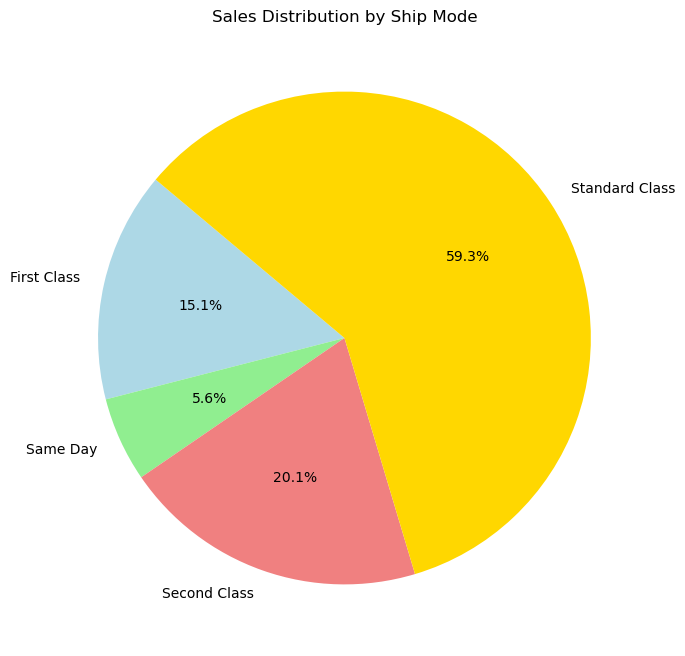

In [307]:
plt.figure(figsize=(8,8))
plt.pie(sales_by_ship_mode['TotalSales'], labels=sales_by_ship_mode['Ship Mode'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Sales Distribution by Ship Mode')
plt.show()

### Order Quantity Distribution:Histogram

In [314]:
query = """
SELECT Quantity
FROM orders;
"""

In [316]:
quantity_distribution = pd.read_sql_query(query, conn)

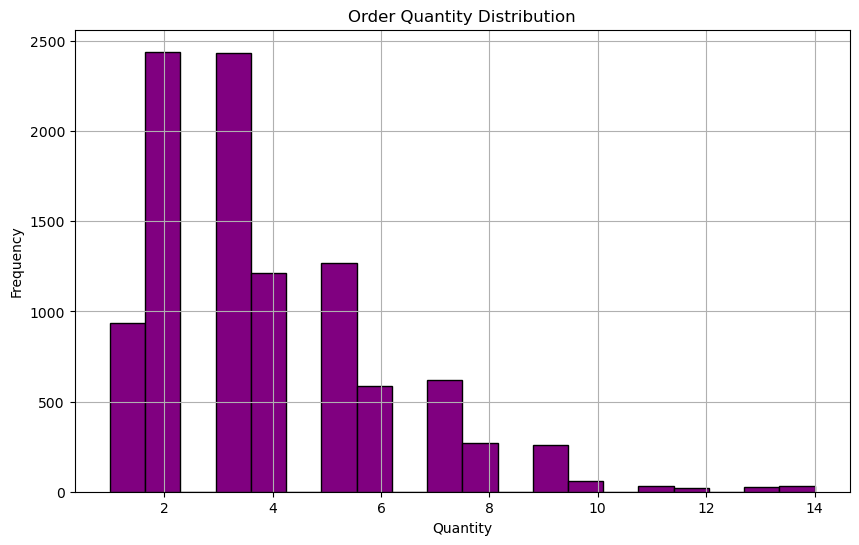

In [318]:
plt.figure(figsize=(10,6))
plt.hist(quantity_distribution['Quantity'], bins=20, color='purple', edgecolor='black')
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Close the connection to the database

In [322]:
conn.close()

# Conclusion

Our SQL-driven analysis of the Superstore dataset provided valuable insights into sales and profitability. Through various SQL queries, we identified top-performing products, analyzed sales trends across different categories and regions, and examined profit distributions. The results, visualized through charts and graphs, highlight significant patterns and trends, enabling a deeper understanding of business performance. This approach demonstrates the effectiveness of SQL in handling complex data queries and provides actionable insights to guide strategic decision-making and improve overall business operations.